# PROJECT 1 by Hsin Chen

## Partners: Mingxin Ye, Alisha Asnani, Rose Garay

In [3807]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3808]:
# Part 1
# Step 1

# Get the URL
r = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')

# Extract the text from the page and use BeautifulSoup to read and parse the data as html
space_soup = BeautifulSoup(r.text, 'html.parser')

# View the content and find the appropriate table
space_soup.prettify()

# Save the aforementioned table as a variable
space_table = space_soup.find('table')

# Use pandas to read in the HTML file and typecast the data as one dataframe object
space_temp = pd.read_html(str(space_table), flavor="bs4")
space = pd.concat(space_temp)

# Name the columns and drop the last one
space.columns = ['rank', 'x_class', 'date', 'region', 'start-time', 'max-time', 'end-time', 'movie']
space.drop(['movie'], axis = 1, inplace = True)

space

,rank,x_class,date,region,start-time,max-time,end-time
0,1,X28.0,2003/11/04,486,19:29,19:53,20:06
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24
3,4,X17.0,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10.0,2003/10/29,486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9.0,2006/12/05,930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39


In [3809]:
# Step 2

# Use datetime import to combine the date and each of the three time columns into three datetime columns.
space['start'] = space['date'].astype(str) + ' ' + space['start-time'].astype(str)
space['max'] = space['date'].astype(str) + ' ' + space['max-time'].astype(str)
space['end'] = space['date'].astype(str) + ' ' + space['end-time'].astype(str)

space['start_datetime'] = pd.to_datetime(space['start'])
space['max_datetime'] = pd.to_datetime(space['max'])
space['end_datetime'] = pd.to_datetime(space['end'])

# Drop the extra columns.
space.drop(['date', 'start-time', 'max-time', 'end-time', 'start', 'max', 'end'], axis = 1, inplace = True)

# Set empty region code as missing (NaN).
space.replace('--', 'NaN', inplace = True)

space

,rank,x_class,region,start_datetime,max_datetime,end_datetime
0,1,X28.0,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17.0,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10.0,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9.0,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [3810]:
# Step 3

# Scrape the data.
r = requests.get('http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html')
nasa_soup = BeautifulSoup(r.text, 'html.parser')
nasa_soup.prettify()

# Slice the table to only retain the information needed.
nasa_soup = nasa_soup.find('pre').get_text()
nasa_soup = nasa_soup.split('\n')[12:494]

# Create a data frame and import the data.
nasa = pd.DataFrame(nasa_soup)

# Split the data into multiple columns and format the data to have proper column names.
nasa = nasa[0].apply(lambda x: pd.Series(x.split()))
nasa = nasa.drop([15, 16, 17, 18, 19, 20, 21, 22, 23], axis = 1)
nasa.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_class', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'plot']

nasa

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


In [3811]:
# Step 4

# Recode any missing entries as NaN.
nasa.replace(['----', '-----', '------', '--/--', '--:--', \
              '????', 'FILA', 'DSF', 'EP','EP?', 'DIM', 'altr'], 'NaN', inplace = True)

# Create a new column that indicates if a row corresponds to a halo flare or not.
nasa['halo?'] = np.where(nasa['cme_angle'] == 'Halo', 'True', 'False')

# Replace Halo entries in the cme_angle column as NA.
nasa['cme_angle'].replace('Halo', 'NA', inplace = True)

# Remove any non-numeric part of the width column
nasa['width_lower?'] = np.where(nasa['cme_width'].str.contains('>'), 'True', 'False')

# Create a new column that indicates if width is given as a lower bound.
nasa['cme_width'] = nasa['cme_width'].str.replace('>','')

# Reformat the time representation so it doesn't generate errors later.
nasa['end_time'].replace('24:00', '00:00', inplace = True)

# Combine date and time columns for start, end and cme so they can be encoded as datetime objects.
for i, row in nasa.iterrows():
    
    # Extract the year from start date and store it as a variable.
    year = row['start_date'][:5]
    
    # Convert end date and time to a datetime object and checking if it exists before doing so.
    if row['end_date'] != 'NaN' and row['end_time'] != 'NaN':
        row['end_date'] = year + row['end_date'] + ' ' + row['end_time']
        row['end_date'] = pd.to_datetime(row['end_date'])
    
    # Convert cme date and time to a datetime object and checking if it exists before doing so.
    if row['cme_date'] != 'NaN' and row['cme_time'] != 'NaN':
        row['cme_date'] = year + row['cme_date'] + ' ' + row['cme_time']
        row['cme_date'] = pd.to_datetime(row['cme_date'])
    
    # Convert start date and time to datetime object.
    row['start_date'] = row['start_date'] + ' ' + row['start_time']
    row['start_date'] = pd.to_datetime(row['start_date'])

# Drop unecessary columns and rename remaining columns.
nasa.drop(['start_time', 'end_time', 'cme_time'], axis = 1, inplace = True)
cols = {'start_date' : 'start_datetime', 'end_date' : 'end_datetime', 'cme_date' : 'cme_datetime'}

nasa

,start_date,end_date,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_date,cme_angle,cme_width,cme_speed,plot,halo?,width_lower?
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


In [3812]:
# Part 2
# Question 1

# Make a new data frame that only contains X class flares.
top50 = nasa.loc[nasa['flare_class'].astype(str).str.contains('X')].copy()

# Create a new column (top50_flare) of the X class flares.
top50['top50_flare'] = top50['flare_class']

# Remove X from the column and cast the values to floats.
top50['top50_flare'] = top50['top50_flare'].str.replace('X', '')
top50['top50_flare'] = top50['top50_flare'].astype(float)

# Sort the data frame in descending order based on the column and drop it.
top50 = top50.sort_values('top50_flare', ascending = False)
top50.drop('top50_flare', axis = 1, inplace = True)

# Take the top 50 result.
top50 = top50.head(50)

top50

,start_date,end_date,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_date,cme_angle,cme_width,cme_speed,plot,halo?,width_lower?
242,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,PHTX,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
234,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,PHTX,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
235,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,PHTX,True,False
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NA,360,882,PHTX,True,False
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NA,360,1610,PHTX,True,False


For this question I looked for the values in the flare_class column in the NASA table and the SpaceWeatherLive table and found that both tables only have 'X' flare class in common. I looked at the SpaceWeatherLive table and realized it is sorted in descending order based on flare importance so I tried to do the same thing to the NASA table. I extracted the values in column flare_class that contain 'X' and sorted them in descending order. It turned out the data are not the same in those datasets. Some of the entries are different; while the flare class from the first dataset ranges from 2.6 to 28.0, the NASA dataset has flare class ranging from 1.8 to 28.0.

In [3813]:
# Question 2

# Create a new column rank.
top50['rank'] = 0

# Iterate the two tables to check if the flare region and flare class match in both tables for each entry.
for i1, row_space in space.iterrows():
    for i2, row_nasa in top50.iterrows():
        if row_space['region'] == int(row_nasa['flare_region']) \
        and row_space['x_class'] == row_nasa['flare_class']: 
            top50.set_value(i2, 'rank', row_space['rank'])

print(top50[top50['flare_region'] == '9415'])

              start_date             end_date start_frequency end_frequency  \
128  2001-04-15 14:05:00  2001-04-16 13:00:00           14000            40   
123  2001-04-06 19:35:00  2001-04-07 01:50:00           14000           230   
125  2001-04-10 05:24:00  2001-04-10 00:00:00           14000           100   
127  2001-04-12 10:20:00  2001-04-12 10:40:00           14000          7000   

    flare_location flare_region flare_class             cme_date cme_angle  \
128         S20W85         9415        X14.  2001-04-15 14:06:00       245   
123         S21E31         9415        X5.6  2001-04-06 19:30:00        NA   
125         S23W09         9415        X2.3  2001-04-10 05:30:00        NA   
127         S19W43         9415        X2.0  2001-04-12 10:31:00        NA   

    cme_width cme_speed  plot  halo? width_lower?  rank  
128       167      1199  PHTX  False        False     0  
123       360      1270  PHTX   True        False    18  
125       360      2411  PHTX   True   

I defined the best matching rows across the two datasets to be the ones that have the same flare location and flare class. I found 7 such matches in the NASA and SpaceWeatherLive table. I tested this out by looking at a common region number (9415) in both tables and seeing how the rest of the information match. 

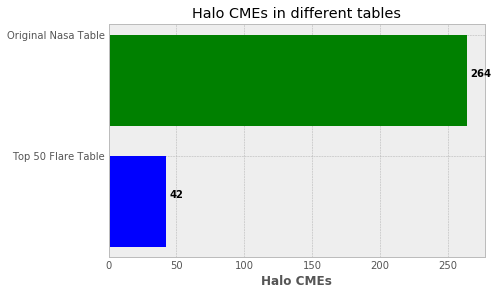

In [3814]:
# Question 3

count = 0 
fifty_count = 0

# Count the number of Halo CMEs in both tables
for i, j in nasa.iterrows():
    if (j['halo?']) == 'True':
        count += 1

for i, j in top50.iterrows():
    if (j['halo?']) == 'True':
        fifty_count += 1
        
# Make the bar chart.
x_labels = ['Top 50 Flare Table', 'Original Nasa Table']
y_labels = [fifty_count, count]
fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(x_labels))
ax.barh(ind, y_labels, width, color= ['blue', 'green'])
ax.set_yticks(ind + width / 2)

# Set graph title name and x, y coordinate names.
ax.set_title('Halo CMEs in different tables')
ax.set_xlabel('Halo CMEs')
ax.set_yticklabels(x_labels)

for i, v in enumerate(y_labels):
    ax.text(v + 3, i + .03, str(v), color = 'black', fontweight='bold')

plt.show()

I created a bar chart to indicate the number of Halo CMEs in the table with top 50 flare importance and the original NASA table. It turns out that the top 50 table tends to have Halo CMEs, with 84% (42/50) compared to 54.77% (264/482) in the original NASA table.